# Performance Evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
report = "kptimes_500_all_report"
csv_file = "../versions/v0.4.0/reports/"+report+".csv"
lang = 'en'
num_preds = 10
keywords_sorted = False

df = pd.read_csv(csv_file, index_col=0, encoding="utf-8")
ke_methods = [i for i in list(df.columns.values) if i!='metric']
metrics = [i for i in df.index.values if not i.endswith('_var')]
var_idxs = [i for i in df.index.values if i.endswith('_var')]
print(f'KE methods detected: {ke_methods}')
print(f'Evaluation metrics detected: {metrics}')
df

KE methods detected: ['tfidf', 'keybert', 'kpminer', 'yake', 'rake', 'textrank', 'singlerank', 'topicrank', 'novel']
Evaluation metrics detected: ['TP/Results', 'wTP/Results', 'Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']


,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank,novel
metric,,,,,,,,,
TP/Results,"(5, 5000)","(0, 5000)","(8, 5000)","(3, 5000)","(0, 5000)","(0, 5000)","(0, 5000)","(5, 5000)","(0, 5000)"
wTP/Results,"(233, 5000)","(82, 5000)","(298, 5000)","(276, 5000)","(76, 5000)","(259, 5000)","(277, 5000)","(217, 5000)","(100, 5000)"
Precision,0.001,0.0,0.002,0.001,0.0,0.0,0.0,0.001,0.0
wPrecision,0.047,0.016,0.06,0.055,0.015,0.052,0.056,0.043,0.02
MRR,0.072,0.001,0.068,0.078,0.002,0.053,0.028,0.088,0.001
MRR_var,0.012,0.0,0.011,0.011,0.0,0.007,0.003,0.012,0.0
wMRR,0.204,0.281,0.182,0.203,0.081,0.187,0.226,0.204,0.128
wMRR_var,0.024,0.039,0.024,0.025,0.01,0.026,0.029,0.022,0.021
MAP,0.072,0.001,0.068,0.078,0.002,0.053,0.028,0.088,0.001


# Plots

In [3]:
df.drop(var_idxs, inplace=True)

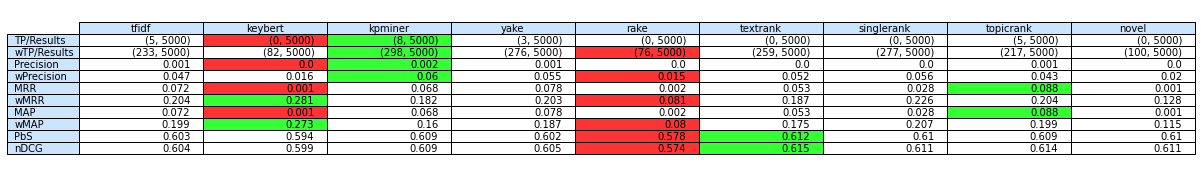

In [4]:
fig, ax = plt.subplots(1,1,figsize=(20,3))
colors = [["w" for _ in range(df.shape[1])] for i in range(df.shape[0])]
max_idxs = [np.argmax(row) for row in df.values[2:]]
min_idxs = [np.argmin(row) for row in df.values[2:]]
max_idxs = [max_idxs[0], max_idxs[1]] + max_idxs
min_idxs = [min_idxs[0], min_idxs[1]] + min_idxs
for i in range(len(max_idxs)):
      colors[i][max_idxs[i]] = "#33FF33"
      colors[i][min_idxs[i]] = "#FF3333"
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns.values,
        rowLabels=df.index,
        rowColours =["#CCE5FF"] * df.shape[0],  
        colColours =["#CCE5FF"] * df.shape[1],
        cellColours=colors,
        loc="center")
plt.show()
#plt.savefig('../testing/reports/'+report+'_table.png')

In [5]:
metrics = metrics[2:] # rows
data = df.values[2:-2].astype(float) # (TP, Results) and similar removed

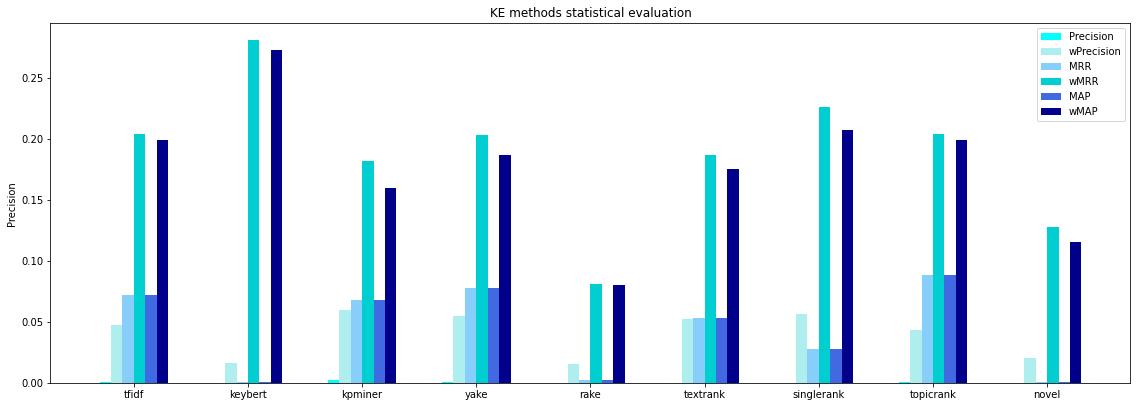

In [6]:
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'cyan', width = 0.10)
ax.bar(X - 0.15, data[1], color = 'paleturquoise', width = 0.10)
ax.bar(X - 0.05, data[2], color = 'lightskyblue', width = 0.10)
ax.bar(X + 0.05, data[3], color = 'darkturquoise', width = 0.10)
ax.bar(X + 0.15, data[4], color = 'royalblue', width = 0.10)
ax.bar(X + 0.25, data[5], color = 'darkblue', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(ke_methods)])
ax.set_xticklabels(ke_methods)
ax.set_ylabel('Precision')
ax.legend(metrics[:-2])
ax.set_title('KE methods statistical evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

- Precision & wPrecision (True Positives / Total num. predictions)
It's a classification metric. Does not consider the rank of the generated keywords, either proximity of the prediction.

- MRR & wMRR (Mean Reciprocal Rank)
It gives the averaged ranking of the first correct prediction. MRR only cares about the single highest-ranked relevant item.

- MAP & wMAP (Mean Average Precision)
It penalizes if irrelevant key-phrases are extracted higher up the order and gradually decrease the significance of the errors (extraction of irrelevant key-phrase) as we go down the list of extracted key-phrases. Still only classifies keyphrases as relevant/irrelevant.

In [7]:
data = df.values[-2:].astype(float) # only PbS & nDCG

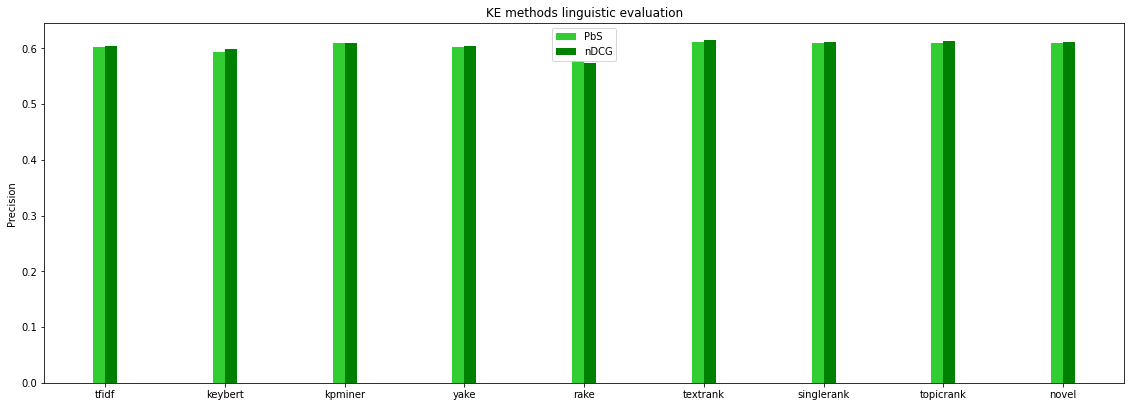

In [8]:
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.05, data[0], color = 'limegreen', width = 0.10)
ax.bar(X + 0.05, data[1], color = 'green', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(ke_methods)])
ax.set_xticklabels(ke_methods)
ax.set_ylabel('Precision')
ax.legend(metrics[-2:])
ax.set_title('KE methods linguistic evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

- PbS (Precision by Similarity)
It considers the relevance of the keyphrases using a (non-binary) score (defined by the user). It does not consider the rank.

- nDCG (Discounted Cumulative Gain)
It considers the relevance of the keyphrases using a (non-binary) score (defined by the user). It also considers the rank, but now using logarithmic reduction factor to penalize in proportion.

# Models by metric

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [10]:
version_path = "../versions/v0.4.0/reports"
version_files = ['semeval2017_all_report.csv', 'kptimes_500_all_report.csv', 'kpcrowd_all_report.csv']
print(f'Reports for version:\n{version_files}')

metric = 'wMAP'
data = []
for file in version_files:
    prov = pd.read_csv(join(version_path, file), index_col=0, encoding="utf-8").transpose()
    prov.drop(prov.columns.difference([metric]), 1, inplace=True)
    prov.rename(columns={metric: file}, inplace=True)
    data.append(prov)
pd.concat(data, axis=1).transpose()

Reports for version:
['semeval2017_all_report.csv', 'kptimes_500_all_report.csv', 'kpcrowd_all_report.csv']


/tmp/ipykernel_94144/3286490588.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  prov.drop(prov.columns.difference([metric]), 1, inplace=True)


,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank,novel
metric,,,,,,,,,
semeval2017_all_report.csv,0.235,0.342,0.24,0.183,0.218,0.242,0.273,0.268,0.254
kptimes_500_all_report.csv,0.199,0.273,0.16,0.187,0.08,0.175,0.207,0.199,0.115
kpcrowd_all_report.csv,0.06,0.126,0.066,0.062,0.077,0.071,0.088,0.075,0.071


# Datasets by metric

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [12]:
path = "../versions/v0.4.0/reports"
files = [f for f in listdir(path) if isfile(join(path, f))]
datasets = sorted([f.replace('_all_report.csv','') for f in files])
print(f'Reports in path:\n{datasets}')

Reports in path:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']


In [13]:
ke_method = 'novel'
metrics = ['Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']

data = []
for file in files:
    prov = pd.read_csv(join(path, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data.append(list(prov[ke_method].astype(float)))
df = pd.DataFrame(data, columns=metrics, index=datasets)
df = df.transpose()
df = df[['kpcrowd', 'kptimes_500', 'semeval2017', 'opensource', 'danewsroom_500', 'sv_themes', 'no_themes']]
df.rename(columns={'kpcrowd': 'KPCrowd',
                   'kptimes_500': 'KPTimes',
                   'semeval2017': 'SemEval2017',
                   'opensource': 'Open Source',
                   'danewsroom_500': 'DaNewsroom',
                   'sv_themes': 'Internal SV',
                   'no_themes': 'Internal NO'}, inplace=True)
df

,KPCrowd,KPTimes,SemEval2017,Open Source,DaNewsroom,Internal SV,Internal NO
Precision,0.000,0.000,0.000,0.000,0.001,0.000,0.000
wPrecision,0.183,0.037,0.020,0.073,0.037,0.013,0.047
MRR,0.000,0.008,0.001,0.018,0.002,0.001,0.021
wMRR,0.563,0.172,0.128,0.283,0.235,0.080,0.181
MAP,0.000,0.008,0.001,0.018,0.002,0.001,0.021
wMAP,0.492,0.158,0.115,0.254,0.208,0.071,0.174
PbS,0.571,0.852,0.610,0.717,0.594,0.617,0.920
nDCG,0.577,0.852,0.611,0.718,0.597,0.616,0.920


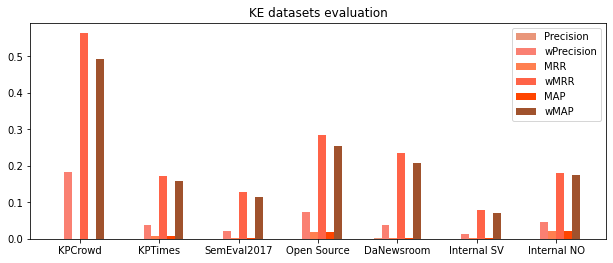

In [14]:
data = df.values.astype(float)
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'darksalmon', width = 0.10)
ax.bar(X - 0.15, data[1], color = 'salmon', width = 0.10)
ax.bar(X - 0.05, data[2], color = 'coral', width = 0.10)
ax.bar(X + 0.05, data[3], color = 'tomato', width = 0.10)
ax.bar(X + 0.15, data[4], color = 'orangered', width = 0.10)
ax.bar(X + 0.25, data[5], color = 'sienna', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(df.columns)])
ax.set_xticklabels(df.columns)
ax.legend(metrics[:-2])
ax.set_title('KE datasets evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

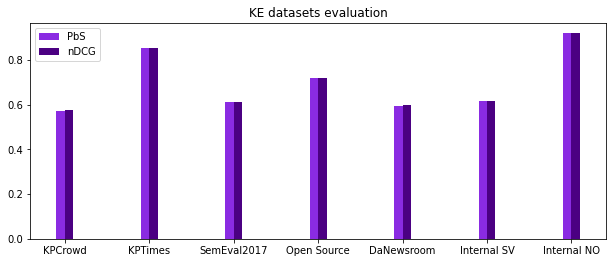

In [15]:
data = df.values[-2:].astype(float) # only PbS & nDCG
X = np.arange(df.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.05, data[0], color = 'blueviolet', width = 0.10)
ax.bar(X + 0.05, data[1], color = 'indigo', width = 0.10)
ax.set_xticks([i for i,_ in enumerate(df.columns)])
ax.set_xticklabels(df.columns)
ax.legend(metrics[-2:])
ax.set_title('KE datasets evaluation')
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

## Version comparison

In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [17]:
path_a = "../versions/v0.4.0/reports"
path_b = "../versions/v0.4.0/ablation/reports"
files_a = [f for f in listdir(path_a) if isfile(join(path_a, f))]
files_b = [f for f in listdir(path_b) if isfile(join(path_b, f))]
datasets_a = sorted([f.replace('_all_report.csv','').replace('_report.csv','') for f in files_a])
datasets_b = sorted([f.replace('_all_report.csv','').replace('_report.csv','') for f in files_b])
print(f'Reports in path A:\n{datasets_a}')
print(f'Reports in path B:\n{datasets_b}')

Reports in path A:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']
Reports in path B:
['danewsroom_500', 'kpcrowd', 'kptimes_500', 'no_themes', 'opensource', 'semeval2017', 'sv_themes']


In [18]:
ke_method = 'novel'
metrics = ['Precision', 'wPrecision', 'MRR', 'wMRR', 'MAP', 'wMAP', 'PbS', 'nDCG']

data_a, data_b = [], []
for file in files_a:
    prov = pd.read_csv(join(path_a, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data_a.append(list(prov[ke_method].astype(float)))
df_a = pd.DataFrame(data_a, columns=metrics, index=datasets_a)
for file in files_b:
    prov = pd.read_csv(join(path_b, file), index_col=0, encoding="utf-8")
    vars = [i for i in prov.index.values if i.endswith('_var')]
    prov = prov.drop(vars).drop(['TP/Results','wTP/Results'])
    data_b.append(list(prov[ke_method].astype(float)))
df_b = pd.DataFrame(data_b, columns=metrics, index=datasets_b)

In [19]:
df_a.compare(df_b)

Precision       wPrecision           MRR          wMRR         \
                    self other       self  other   self  other   self  other   
danewsroom_500     0.001   0.0      0.037  0.025  0.002  0.000  0.235  0.143   
kpcrowd              NaN   NaN      0.183  0.174    NaN    NaN  0.563  0.467   
kptimes_500          NaN   NaN      0.037  0.031  0.008  0.012  0.172  0.132   
no_themes            NaN   NaN      0.047  0.039  0.021  0.018  0.181  0.156   
opensource           NaN   NaN      0.073  0.018  0.018  0.002  0.283  0.091   
semeval2017          NaN   NaN      0.020  0.054  0.001  0.015  0.128  0.201   
sv_themes            NaN   NaN      0.013  0.012  0.001  0.002  0.080  0.060   

                  MAP          wMAP           PbS          nDCG         
                 self  other   self  other   self  other   self  other  
danewsroom_500  0.002  0.000  0.208  0.128  0.594  0.556  0.597  0.555  
kpcrowd           NaN    NaN  0.492  0.414  0.571  0.520  0.577  0.525  
kptimes_500     0.008  0.012  0.158  0.118  0.852  0.840  0.852  0.840  
no_themes       0.021  0.018  0.174  0.140  0.920  0.915  0.920  0.915  
opensource      0.018  0.002  0.254  0.084  0.717  0.586  0.718  0.586  
semeval2017     0.001  0.015  0.115  0.179  0.610  0.689  0.611  0.690  
sv_themes       0.001  0.002  0.071  0.054  0.617  0.594  0.616  0.593

In [20]:
df_b.subtract(df_a)

,Precision,wPrecision,MRR,wMRR,MAP,wMAP,PbS,nDCG
danewsroom_500,-0.001,-0.012,-0.002,-0.092,-0.002,-0.080,-0.038,-0.042
kpcrowd,0.000,-0.009,0.000,-0.096,0.000,-0.078,-0.051,-0.052
kptimes_500,0.000,-0.006,0.004,-0.040,0.004,-0.040,-0.012,-0.012
no_themes,0.000,-0.008,-0.003,-0.025,-0.003,-0.034,-0.005,-0.005
opensource,0.000,-0.055,-0.016,-0.192,-0.016,-0.170,-0.131,-0.132
semeval2017,0.000,0.034,0.014,0.073,0.014,0.064,0.079,0.079
sv_themes,0.000,-0.001,0.001,-0.020,0.001,-0.017,-0.023,-0.023


### Time comparison

In [21]:
path_a = "../versions/v0.4.0/timing"
path_b = "../versions/v0.4.0/ablation/timing"
jsonnames_a = [f for f in listdir(path_a) if isfile(join(path_a, f))]
jsonnames_b = [f for f in listdir(path_b) if isfile(join(path_b, f))]
print(f'Time reports in path A:\n{jsonnames_a}')
print(f'Time reports in path B:\n{jsonnames_b}')
jsons_a = {}
jsons_b = {}
for file in jsonnames_a:
    with open(join(path_a, file)) as f:
        jsons_a[file.replace('.json','')] = json.load(f)
for file in jsonnames_b:
    with open(join(path_b, file)) as f:
        jsons_b[file.replace('.json','')] = json.load(f)
cols = next(iter(jsons_a.values())).keys()
df_ta = pd.DataFrame([jsons_a[k] for k in jsons_a.keys()],
                     columns=cols,
                     index=jsons_a.keys())
df_tb = pd.DataFrame([jsons_b[k] for k in jsons_b.keys()],
                     columns=cols,
                     index=jsons_b.keys())

Time reports in path A:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']
Time reports in path B:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']


In [22]:
df_ta.compare(df_tb)

preprocessing         keyphrase_cand_generation           \
                        self   other                      self    other   
semeval2017           0.0464  0.0450                   20.7199  20.8136   
danewsroom_500        0.0927  0.0916                   36.4715  35.8724   
kptimes_500           0.1605  0.1581                   70.7547  72.0884   
kpcrowd               0.0911  0.0881                   41.8271  42.1801   
opensource            0.0728  0.0789                   27.8685  27.2094   
no_themes             0.0098  0.0147                    4.2946   4.0167   
sv_themes             0.0103  0.0165                   23.3418  21.4431   

               word_scores         keyphrase_score         doc-embeddings  \
                      self   other            self   other           self   
semeval2017         0.7952  0.7988          0.7884  0.7836         8.6893   
danewsroom_500      1.4894  1.4908          1.0603  1.0616        10.4725   
kptimes_500         2.6969  2.7137          2.4218  2.3961        12.5349   
kpcrowd             1.5455  1.5635          1.4366  1.4447         6.9630   
opensource          1.1611  1.1442          0.8314  0.8280         7.4074   
no_themes           0.1441  0.1423          0.1322  0.1345         1.7174   
sv_themes           0.1602  0.1586          0.1366  0.1378         1.4913   

                     candidate-embeddings       ordering_keyphrases        \
               other                 self other                self other   
semeval2017      0.0             268.4619   0.0              6.1187   0.0   
danewsroom_500   0.0             289.8953   0.0              6.6274   0.0   
kptimes_500      0.0             285.3927   0.0              6.8027   0.0   
kpcrowd          0.0             212.6967   0.0              5.0110   0.0   
opensource       0.0             198.5246   0.0              4.4737   0.0   
no_themes        0.0              36.6155   0.0              0.7606   0.0   
sv_themes        0.0              33.3416   0.0              0.7532   0.0   

               total_elapsed           
                        self    other  
semeval2017         305.6204  22.4421  
danewsroom_500      346.1098  38.5178  
kptimes_500         380.7648  77.3578  
kpcrowd             269.5716  45.2775  
opensource          240.3403  29.2616  
no_themes            43.6748   4.3085  
sv_themes            59.2355  21.7565

# Time Analysis

In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [24]:
version_path = "../versions/v0.4.0/timing"
dataset_path = "../versions/others/timing"

version_files = [f for f in listdir(version_path) if isfile(join(version_path, f))]
dataset_files = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))]
print(f'Time reports for version:\n{version_files}')
print(f'Time reports for baselines:\n{dataset_files}')
version_jsons = {}
dataset_jsons = {}
version_files = ['kpcrowd.json', 'kptimes_500.json', 'semeval2017.json']
dataset_files = ['kpcrowd.json', 'kptimes_500.json', 'semeval2017.json']
for file in version_files:
    with open(join(version_path, file)) as f:
        version_jsons[file.replace('.json','')] = json.load(f)
for file in dataset_files:
    with open(join(dataset_path, file)) as f:
        dataset_jsons[file.replace('.json','')] = json.load(f)
version_cols = next(iter(version_jsons.values())).keys()
data_cols = next(iter(dataset_jsons.values())).keys()
df_ver = pd.DataFrame([version_jsons[k] for k in version_jsons.keys()],
                      columns=version_cols,
                      index=version_jsons.keys())
df_data = pd.DataFrame([dataset_jsons[k] for k in dataset_jsons.keys()], 
                       columns=data_cols, 
                       index=dataset_jsons.keys())


Time reports for version:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']
Time reports for baselines:
['semeval2017.json', 'danewsroom_500.json', 'kptimes_500.json', 'kpcrowd.json', 'opensource.json', 'no_themes.json', 'sv_themes.json']


In [25]:
df_ver

,preprocessing,keyphrase_cand_generation,word_scores,keyphrase_score,doc-embeddings,candidate-embeddings,ordering_keyphrases,total_elapsed
kpcrowd,0.0911,41.8271,1.5455,1.4366,6.9630,212.6967,5.0110,269.5716
kptimes_500,0.1605,70.7547,2.6969,2.4218,12.5349,285.3927,6.8027,380.7648
semeval2017,0.0464,20.7199,0.7952,0.7884,8.6893,268.4619,6.1187,305.6204


In [26]:
#df_data['novel'] = df_ver['total_elapsed']
df_data

,tfidf,keybert,kpminer,yake,rake,textrank,singlerank,topicrank
kpcrowd,1487.6599,169.5402,464.7494,501.7306,2.4610,41.6025,222.9372,252.2484
kptimes_500,1912.8570,304.9731,679.4242,806.6886,4.4205,69.9972,315.2775,375.8322
semeval2017,877.2621,74.8115,521.4357,304.9648,1.0995,21.7247,257.0178,264.0052


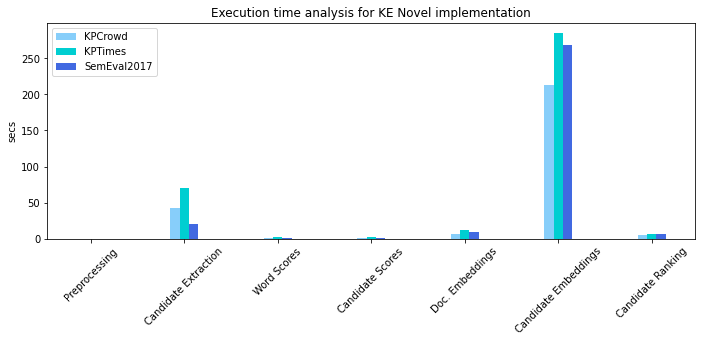

In [30]:
data = df_ver.values.astype(float)
X = np.arange(df_ver.shape[1]-1)
fig = plt.figure(figsize=(9,3))
ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.20, data[0][:-1], color = 'paleturquoise', width = 0.10)
ax.bar(X - 0.10, data[0][:-1], color = 'lightskyblue', width = 0.10)
ax.bar(X       , data[1][:-1], color = 'darkturquoise', width = 0.10)
ax.bar(X + 0.10, data[2][:-1], color = 'royalblue', width = 0.10)
#ax.bar(X + 0.20, data[4][:-1], color = 'darkblue', width = 0.10)
ax.set_xticks([i for i in range(df_ver.shape[1]-1)])
ax.set_xticklabels([
    'Preprocessing', 'Candidate Extraction', 'Word Scores',
    'Candidate Scores', 'Doc. Embeddings', 'Candidate Embeddings',
    'Candidate Ranking'], rotation=45)
ax.set_ylabel('secs')
ax.legend(['KPCrowd', 'KPTimes', 'SemEval2017'], loc='upper left')
ax.set_title("Execution time analysis for KE Novel implementation")
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../testing/reports/'+report+'_barplot.png')

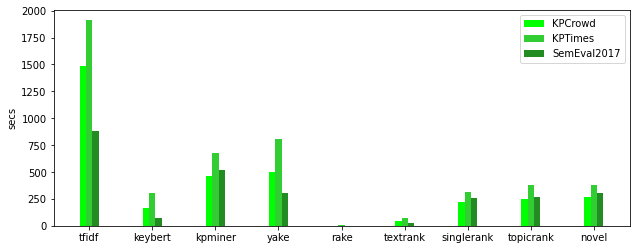

In [31]:
df_data['novel'] = df_ver['total_elapsed']

data = df_data.values.astype(float)
X = np.arange(df_data.shape[1])
fig = plt.figure(figsize=(8,3))
ax = fig.add_axes([0,0,1,1])
#ax.bar(X - 0.20, data[0], color = 'mediumspringgreen', width = 0.10)
ax.bar(X - 0.10, data[0], color = 'lime', width = 0.10)
ax.bar(X       , data[1], color = 'limegreen', width = 0.10)
ax.bar(X + 0.10, data[2], color = 'forestgreen', width = 0.10)
#ax.bar(X + 0.20, data[4], color = 'darkgreen', width = 0.10)
ax.set_xticks([i for i in range(df_data.shape[1])])
ax.set_xticklabels(list(df_data.columns.values))
ax.set_ylabel('secs')
ax.legend(['KPCrowd', 'KPTimes', 'SemEval2017'])
#ax.set_ylim([0.0, 0.7])
plt.show()
#plt.savefig('../timing_comparison.png')